# Titanic Case study - Practice project

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
#importing the required libraries to read the file 
import pandas as pd
import numpy as np

In [2]:
#reading the file using csv method
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns having null values are: Age, Cabin, Embarked. They need to be filled up with appropriate values later on.

In [6]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#Number of passengers in each class
df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


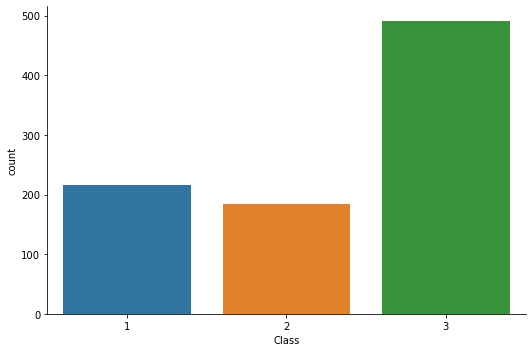

In [10]:
#Instead of a group by, use seaborn to plot the count of passengers in each class
import seaborn as sns
fg = sns.factorplot('Pclass', data=df, kind='count', aspect=1.5)
fg.set_xlabels('Class')

In [11]:
df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


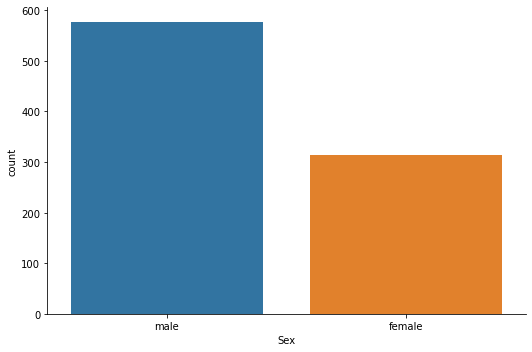

In [12]:
#Instead of a group by, use seaborn to plot the number of males and females
sns.factorplot('Sex', data=df, kind='count', aspect=1.5)

There are almost two times males as much as there were females.

In [13]:
#Number of men and women in each of the passenger class
df.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


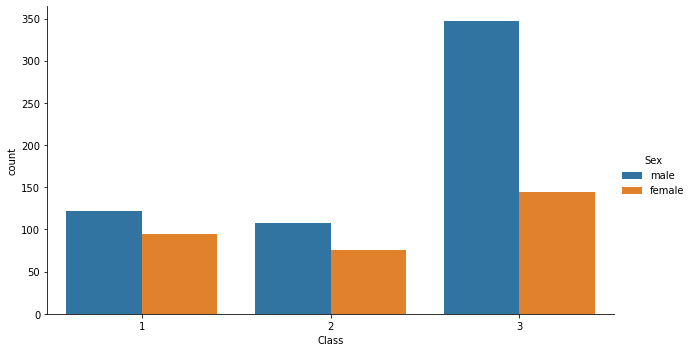

In [14]:
# Again use saeborn to group by Sex and class
g = sns.factorplot('Pclass', data=df, hue='Sex', kind='count', aspect=1.75)
g.set_xlabels('Class')

As shown in the figure above, there are more than two times males than females in class 3. However, in classes 1 and 2, the ratio of male to female is almost 1.

In [15]:
#Number of passengers who survived in each class grouped by sex. Also total was found for each class grouped by sex.
df.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


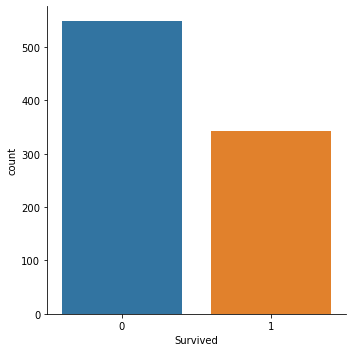

In [16]:
not_survived = df[df['Survived']==0]

#Factor plot of those who survived vs. who didn't
sns.factorplot('Survived', data=df, kind='count')

In [17]:
# Total number of passengers who didn't survive 
len(not_survived)

549

In [18]:
#Number of passengers who did not survive in each class grouped by sex.
not_survived.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=len, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,3,6,72,81
male,77,91,300,468
All,80,97,372,549


In [19]:
# Passengers who survived and who didn't survive grouped by class and sex
table = pd.crosstab(index=[df.Survived,df.Pclass], columns=[df.Sex,df.Embarked])
table.unstack()

Sex      female                              male                           \
Embarked      C         Q          S            C         Q          S       
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2   
Survived                                                                     
0             1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82   
1            42  7  15  1  2  24  46  61  33   17  2  10  0  0   3  28  15   

Sex            
Embarked       
Pclass      3  
Survived       
0         231  
1          34

In [20]:
table.columns, table.index

(MultiIndex([('female', 'C'),
             ('female', 'Q'),
             ('female', 'S'),
             (  'male', 'C'),
             (  'male', 'Q'),
             (  'male', 'S')],
            names=['Sex', 'Embarked']),
 MultiIndex([(0, 1),
             (0, 2),
             (0, 3),
             (1, 1),
             (1, 2),
             (1, 3)],
            names=['Survived', 'Pclass']))

In [21]:
#Change name of columns
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table.columns.set_levels(['Cherbourg','Queenstown','Southampton'], level=1, inplace=True)
table

C:\Users\alivi\AppData\Local\Temp/ipykernel_9080/2514047735.py:2: FutureWarning: inplace is deprecated and will be removed in a future version.
  table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
C:\Users\alivi\AppData\Local\Temp/ipykernel_9080/2514047735.py:3: FutureWarning: inplace is deprecated and will be removed in a future version.
  table.columns.set_levels(['Cherbourg','Queenstown','Southampton'], level=1, inplace=True)


Sex                Female                             Male             \
Embarked        Cherbourg Queenstown Southampton Cherbourg Queenstown   
Survived Pclass                                                         
0        1              1          0           2        25          1   
         2              0          0           6         8          1   
         3              8          9          55        33         36   
1        1             42          1          46        17          0   
         2              7          2          61         2          0   
         3             15         24          33        10          3   

Sex                          
Embarked        Southampton  
Survived Pclass              
0        1               51  
         2               82  
         3              231  
1        1               28  
         2               15  
         3               34

In [23]:
print('Average and median age of passengers are %0.f and %0.f years old, respectively'%(df.Age.mean(),df.Age.median()))

Average and median age of passengers are 30 and 28 years old, respectively


In [24]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
#Drop missing values for the records in which age passenger is missing
age = df['Age'].dropna()

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution of Passengers' Ages")

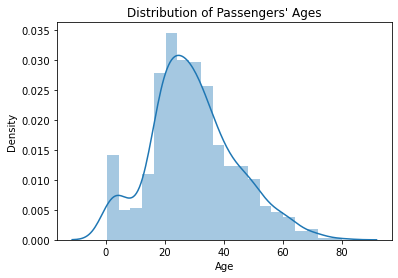

In [26]:
#Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

<AxesSubplot:>

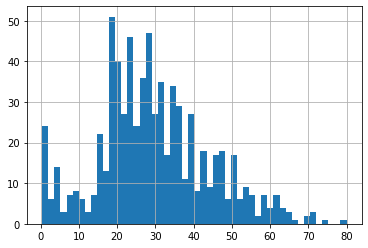

In [28]:
#Another way to plot a histogram of ages is shown below
df['Age'].hist(bins=50)

In [29]:
df['Parch'].dtype, df['SibSp'].dtype, len(df.Cabin.dropna())

(dtype('int64'), dtype('int64'), 204)

In [30]:
#Create a function to define those who are children (less than 16)
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [31]:
df['person'] = df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [32]:
#Lets have a look at the first 10 rows of the data frame
df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


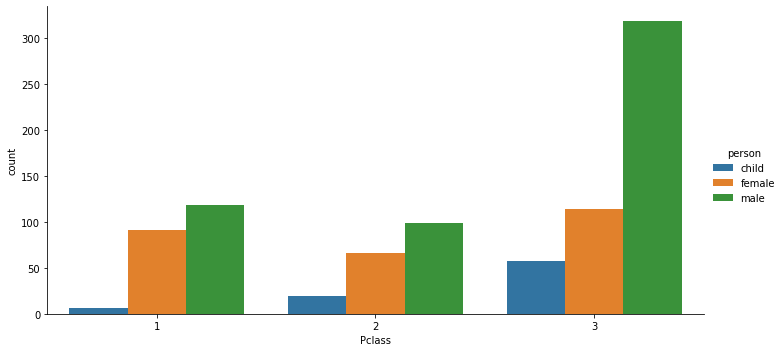

In [34]:
#Lets do a factorplot of passengers splitted into sex, children and class
sns.factorplot('Pclass', data=df, kind='count', hue='person', order=[1,2,3],hue_order=['child','female','male'], aspect=2)

In [35]:
#Count number of men, women and children
df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


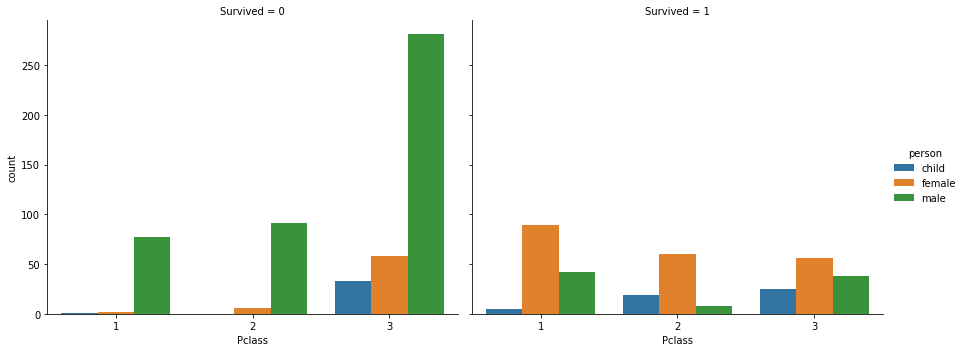

In [37]:
#Do the same as above, but split the passengers into either survived or not
sns.factorplot('Pclass', data=df, kind='count', hue='person', col='Survived', order=[1,2,3],hue_order=['child','female','male'], aspect=1.25, size=5)

There are much more children in third class than there are in first and second class. However, one may expect that there woould be more children in 1st and 2nd class than there are in 3rd class.

# kde plot, Distribution of Passengers' Ages

Grouped by Gender

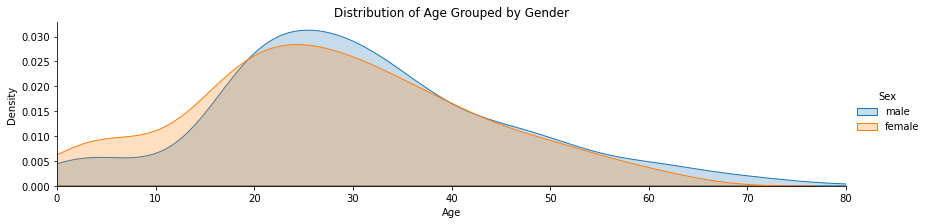

In [38]:
fig = sns.FacetGrid(df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

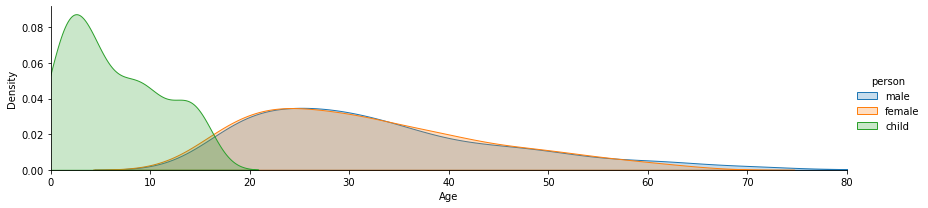

In [39]:
fig = sns.FacetGrid(df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Grouped by Class

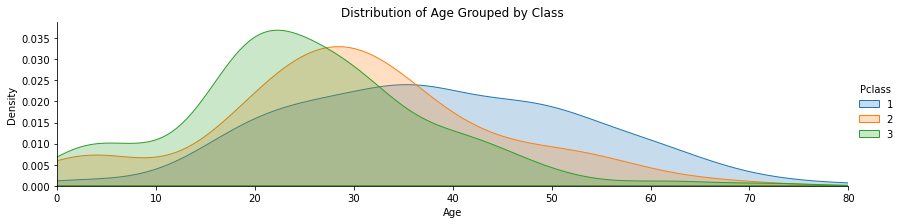

In [40]:
fig = sns.FacetGrid(df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Class')
fig.add_legend()

From the plot above, class 1 has a normal distribution. However, classes 2 and 3 have a skewed distribution towards 20 and 30-year old passengers.

In [41]:
#checking what cabins did the passengers stay in
deck = df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [42]:
#Grab the first letter of the cabin letter
d = []
for c in deck:
    d.append(c[0])

d[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [43]:
from collections import Counter
Counter(d)

Counter({'C': 59, 'E': 32, 'G': 4, 'D': 33, 'A': 15, 'B': 47, 'F': 13, 'T': 1})

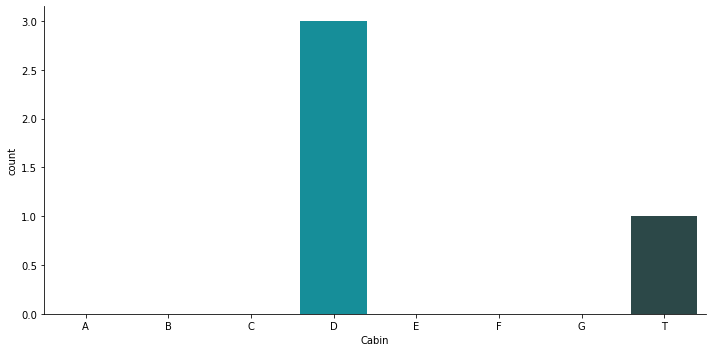

In [46]:
#Now lets factorplot the cabins. First transfer the d list into a data frame. Then rename the column Cabin 
cabin_df = Counter(d)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin', data=df, kind='count', order=['A','B','C','D','E','F','G','T'], aspect=2,palette='winter_d')

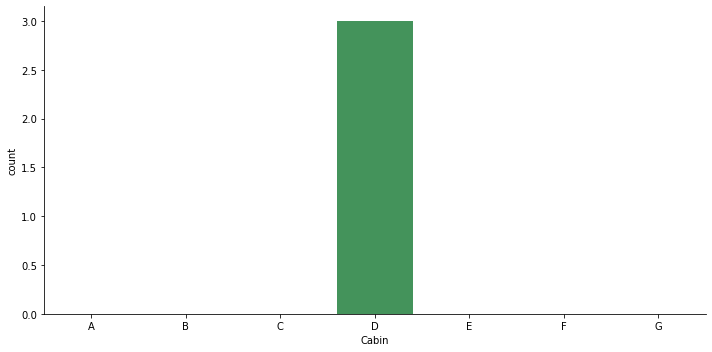

In [51]:
#Drop the 'T' cabin
cabin_df = df[df['Cabin'] != 'T']

#Then replot the Cabins factorplot as above
sns.factorplot('Cabin', data=df, kind='count', order=['A','B','C','D','E','F','G'], aspect=2, palette='Greens_d')

In [52]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
#For tabulated values, use crosstab pandas method instead of the factorplot in seaborn
port = pd.crosstab(index=[df.Pclass], columns=[df.Embarked])
port.columns = [['Cherbourg','Queenstown','Southampton']]
port

,Cherbourg,Queenstown,Southampton
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [55]:
port.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

In [56]:
port.columns

MultiIndex([(  'Cherbourg',),
            ( 'Queenstown',),
            ('Southampton',)],
           )

In [57]:
port.index=[['First','Second','Third']]
port

,Cherbourg,Queenstown,Southampton
First,85,2,127
Second,17,3,164
Third,66,72,353


In [58]:
#Who was alone and who was with parents or siblings?
df[['SibSp','Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [59]:
#Alone dataframe i.e. the passenger has no siblings or parents
alone_df = df[(df['SibSp'] == 0) & (df['Parch']==0)]
# Add Alone column
alone_df['Alone'] = 'Alone'
#Not alone data frame i.e. the passenger has either a sibling or a parent.
not_alone_df = df[(df['SibSp'] != 0) | (df['Parch']!=0)]
not_alone_df['Alone'] = 'With family'

# Merge the above dataframes
comb = [alone_df, not_alone_df]
# Merge and sort by index
df = pd.concat(comb).sort_index()

C:\Users\alivi\AppData\Local\Temp/ipykernel_9080/1335112005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alone_df['Alone'] = 'Alone'
C:\Users\alivi\AppData\Local\Temp/ipykernel_9080/1335112005.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_alone_df['Alone'] = 'With family'


In [60]:
[len(alone_df), len(not_alone_df)]

[537, 354]

In [61]:
# Show the first five records of the alone data frame
alone_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone


In [62]:
#Show the first five rows of the not alone data frame
not_alone_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With family


In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Now lets look at the factors that help someone survived the sinking. We start this analysis by adding a new
cloumn to the titanic data frame. Use the Survived column to map to the new column with factors 0:no and 1:yes
using the map method.

In [64]:
df['Survivor'] = df.Survived.map({0:'no', 1:'yes'})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


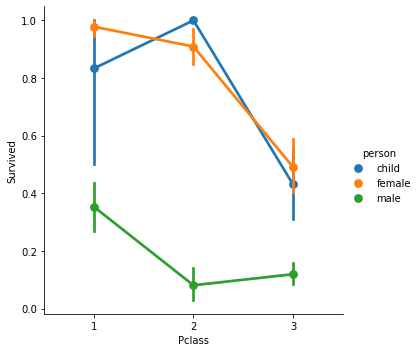

In [66]:
#Survived vs. class Grouped by gender
sns.factorplot('Pclass','Survived', hue='person', data=df, order=range(1,4), hue_order = ['child','female','male'])

From the figure above, being a male or a third class reduce the chance for one to survive.

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


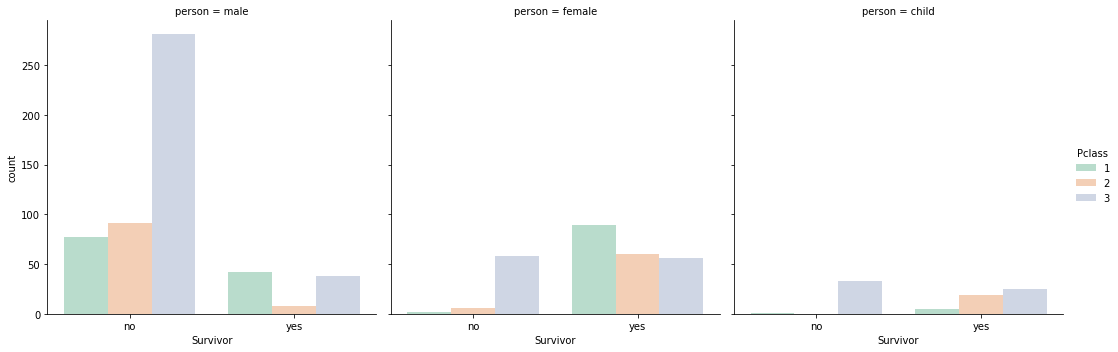

In [67]:
sns.factorplot('Survivor', data=df, hue='Pclass', kind='count', palette='Pastel2', hue_order=range(1,4),col='person')

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


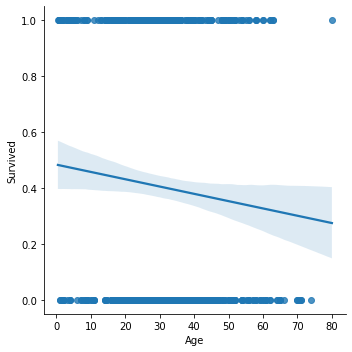

In [68]:
#Linear plot of age vs. survived
sns.lmplot('Age', 'Survived', data=df)

There seems to be a general linear trend between age and the survived field. The plot shows that the older the passenger is, the less chance he/she would survive.

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


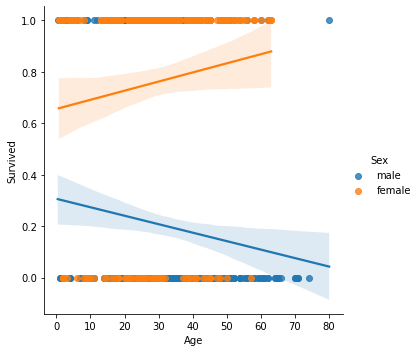

In [70]:
#Survived vs. Age grouped by Sex
sns.lmplot('Age', 'Survived', data=df, hue='Sex')

Older women have higher rate of survival than older men as shown in the figure above. Also, older women has higher rate of srvival than younger women; an opposite trend to the one for the male passengers.

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


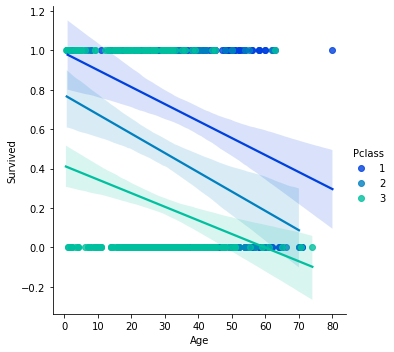

In [71]:
#Survived vs. Age gruped by class
sns.lmplot('Age', 'Survived', hue='Pclass', data=df, palette='winter', hue_order=range(1,4))

In all three classes, the chance to survive reduced as the passengers got older.

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


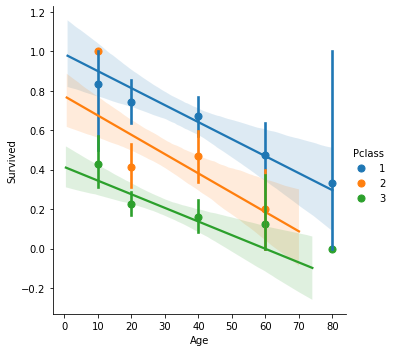

In [72]:
#Create a generation bin
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=df,x_bins=generations, hue_order=[1,2,3])

Deck Factor

In [73]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'person', 'Alone',
       'Survivor'],
      dtype='object')

In [74]:
titanic_DF = df.dropna(subset=['Cabin'])
d[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [75]:
len(titanic_DF), len(d)

(204, 204)

In [76]:
titanic_DF['Deck'] = d
titanic_DF = titanic_DF[titanic_DF.Deck != 'T']
titanic_DF.head()

C:\Users\alivi\AppData\Local\Temp/ipykernel_9080/608588134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_DF['Deck'] = d


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C


C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


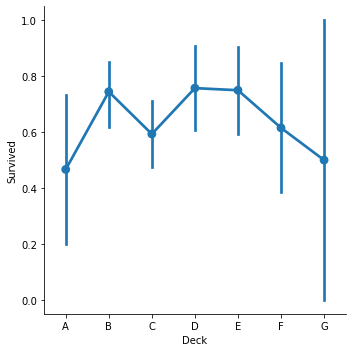

In [77]:
sns.factorplot('Deck', 'Survived', data=titanic_DF, order=['A','B','C','D','E','F','G'])

There does not seem to be any relation between deck and the survival rate as shown in the above figure!

Family status factor

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


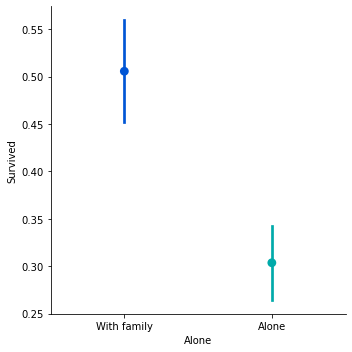

In [79]:
sns.factorplot('Alone', 'Survived', data=df, palette='winter')
#hue='person',hue_order=['child', 'female', 'male']

There seems that the survival rate diminishes significantly for those who were alone. However, lets check if a gender or age play a factor. From the figure below, one may conclude that the survival rate for women and children are much higher than that of men, as was concluded previously and as anticipated. However, the survival rate is not significant for either gender or for children who were with family versus who were alone. Moreover, the survival rate for women and children increases for those who were alone. For men, the survival rate diminishes slightly for those who were alone versus for those who were with family.

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


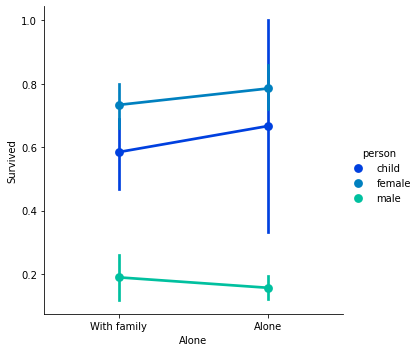

In [80]:
sns.factorplot('Alone', 'Survived', data=df, palette='winter', hue='person',hue_order=['child', 'female', 'male'])

C:\Users\alivi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\alivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


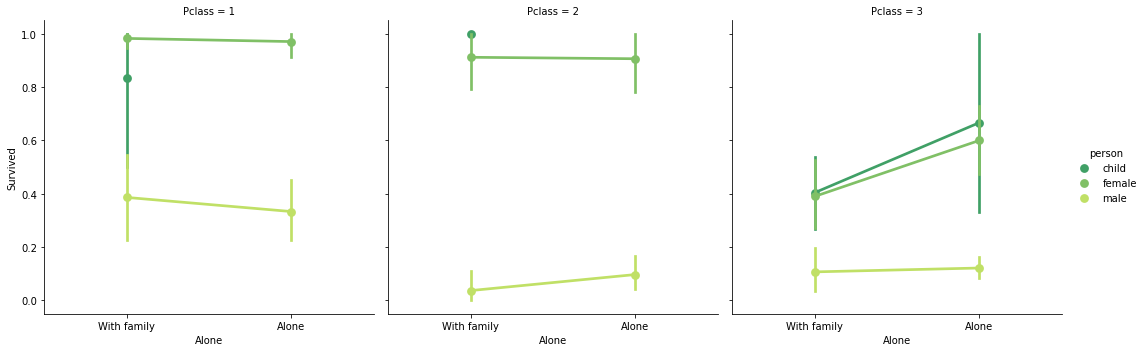

In [82]:
# Lets split it by class now!
sns.factorplot('Alone', 'Survived', data=df, palette='summer', hue='person',hue_order=['child', 'female', 'male'], col='Pclass', col_order=[1,2,3])